In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
df = pd.read_csv("epi.csv", encoding = "latin-1")
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
df.shape

(20052, 680)

In [3]:
df[df.isna().any(axis=1)]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Spicy Noodle Soup,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,"""Fried"" Chicken",3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20012,Pepperoni Spaghetti Cakes,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20016,Autumn Pear Chip,3.125,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20026,Spinach with Chickpeas and Fried Eggs,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20035,Herbed Goat Cheese and Roasted-Vegetable Sandw...,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df2=df.dropna().drop_duplicates().drop(["title"],axis=1)
df2.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
x2 = df2.drop("cake", axis=1)
y2 = df2["cake"]

In [6]:
import pandas as pd
from sklearn import preprocessing

numeric = x2.select_dtypes(include=[np.number]).columns
min_max_scaler = preprocessing.MinMaxScaler()
x2[numeric] = min_max_scaler.fit_transform(x2[numeric])

In [183]:
df3.columns = cols

In [174]:
df3["cake"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14441    0.0
14442    0.0
14443    0.0
14444    0.0
14445    0.0
Name: cake, Length: 14446, dtype: float64

In [184]:
df3

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,1.414755e-05,0.000127,0.000004,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.338372e-05,0.000076,0.000013,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.479685e-06,0.000025,0.000004,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.816599e-05,0.000085,0.000019,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.148328e-05,0.000080,0.000046,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,9.298860e-07,0.000008,0.000001,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14442,2.228405e-05,0.000093,0.000016,0.000021,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14443,1.869735e-05,0.000131,0.000022,0.000024,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14444,2.095565e-05,0.000190,0.000014,0.000019,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [8]:
select= SelectKBest(chi2,k=10)
X_new = select.fit_transform(x2,y2)

In [9]:
mask1 = select.get_support()
features = x2.columns[mask1]
features

Index(['almond', 'bake', 'birthday', 'chocolate', 'cream cheese', 'dessert',
       'egg', 'kidney friendly', 'mixer', 'pescatarian'],
      dtype='object')

In [10]:
split = round(len(df2)*0.25)

In [218]:
features[0]

'almond'

In [11]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [190]:
df4 = df3.loc

In [191]:
df4

,almond,bake,birthday,chocolate,cream cheese,dessert,egg,kidney friendly,mixer,pescatarian
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14441,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14443,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
trainx = x2[:split]
trainy = y2[:split]
testx = x2[split:]
testy = y2[split:]

In [14]:
trainx2 = x2[qbert][:split]
testx2 = x2[qbert][split:]

In [247]:
features

Index(['almond', 'bake', 'birthday', 'chocolate', 'cream cheese', 'dessert',
       'egg', 'kidney friendly', 'mixer', 'pescatarian'],
      dtype='object')

In [15]:
t = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
coefs = []

for i in t:
    clf = LogisticRegression(C= 1/i, penalty= "l1", solver='liblinear')
    clf.fit(trainx,trainy)
    coefs.append(clf.coef_)

In [13]:
qbert = list(features)

In [232]:
testx.shape

(3612, 677)

In [17]:
import math
math.log(1)

0.0

In [70]:
features

Index(['almond', 'bake', 'birthday', 'chocolate', 'cream cheese', 'dessert',
       'egg', 'kidney friendly', 'mixer', 'pescatarian'],
      dtype='object')

In [18]:
clf = LogisticRegression(C= 1/t, penalty= "l1", solver='liblinear')

TypeError: unsupported operand type(s) for /: 'int' and 'list'

In [19]:
def coef(t):
    clf = LogisticRegression(C= 1/t, penalty= "l1", solver='liblinear')
    clf.fit(trainx2,trainy)
    return(clf.coef_)

In [108]:
for i in range(1,11):
    print(i/10)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [20]:
t=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
coef1=[]
for i in t:
    clf = LogisticRegression(C= 1/i, penalty= "l1", solver='liblinear')
    clf.fit(trainx,trainy)
    coef1.append(clf.coef_.ravel())

In [21]:
error1=[]
for i in t:
    clf = LogisticRegression(C= 1/i, penalty= "l1", solver='liblinear')
    clf.fit(trainx,trainy)
    error = 1 - clf.score(trainx, trainy)
    error1.append(error)

In [22]:
a = min(error1)
b = error1.index(a)
print("t-value that minimizes error: ", t[b])
print("Test error: ", a)

t-value that minimizes error:  0.1
Test error:  0.010797342192691017


In [23]:
coef2=[]
for i in t:
    clf = LogisticRegression(penalty='l1', C=1/i, solver='liblinear')
    clf.fit(trainx2,trainy)
    coef2.append(clf.coef_.ravel())

In [24]:
error2=[]
for i in t:
    clf = LogisticRegression(C= 1/i, penalty= "l1", solver='liblinear')
    clf.fit(trainx2,trainy)
    error = 1 - clf.score(trainx2, trainy)
    error2.append(error)

In [25]:
a = min(error2)
b = error2.index(a)
print("t-value that minimizes error: ", t[b])
print("Test error: ", a)

t-value that minimizes error:  0.1
Test error:  0.03654485049833889


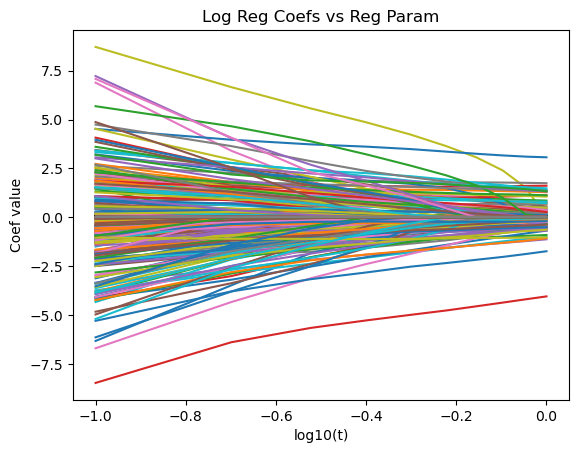

In [26]:
fig, ax = plt.subplots()
ax.plot(np.log10(t), coef1)
ax.set_xlabel('log10(t)')
ax.set_ylabel('Coef value')
ax.set_title('Log Reg Coefs vs Reg Param')
plt.show()

In [27]:
import math

In [27]:
t=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
logt=[]
almond = []
bake = []
birthday = []
chocolate = []
cream = []
dessert = []
egg = []
kidney = []
mixer = []
fish = []

for i in t:
    logt.append(math.log(i))
    a = coef(i)
    almond.append(a[0][0])
    bake.append(a[0][1])
    birthday.append(a[0][2])
    chocolate.append(a[0][3])
    cream.append(a[0][4])
    dessert.append(a[0][5])
    egg.append(a[0][6])
    kidney.append(a[0][7])
    mixer.append(a[0][8])
    fish.append(a[0][9])

In [28]:
data = {"t-value": t,"Almond coefficient": almond,"Bake coefficient": bake, "Birthday coefficient": birthday, "Chocolate coefficient": chocolate,"Cream cheese coefficient": cream, "Dessert coefficient": dessert, "Egg coefficient": egg, "Kidney friendly coefficient": kidney, "Mixer coefficient": mixer, "Pescatarian coefficient": fish}
shows = pd.DataFrame(data)
shows

,t-value,Almond coefficient,Bake coefficient,Birthday coefficient,Chocolate coefficient,Cream cheese coefficient,Dessert coefficient,Egg coefficient,Kidney friendly coefficient,Mixer coefficient,Pescatarian coefficient
0,0.1,0.491623,1.937266,2.248379,0.602194,1.591550,2.749548,0.239644,-0.507947,1.083242,0.221993
1,0.2,0.480943,1.925047,2.225812,0.597629,1.580647,2.741067,0.235285,-0.496604,1.076985,0.212841
2,0.3,0.470374,1.912866,2.203451,0.593125,1.569852,2.732274,0.230961,-0.485253,1.070821,0.203690
3,0.4,0.459787,1.901073,2.181414,0.588666,1.559174,2.723924,0.226581,-0.474067,1.064684,0.194643
4,0.5,0.449282,1.889385,2.159651,0.584319,1.548657,2.715740,0.222288,-0.462836,1.058649,0.185635
5,0.6,0.438799,1.878106,2.138155,0.579929,1.538191,2.707878,0.218002,-0.451825,1.052626,0.176772
6,0.7,0.428339,1.866986,2.116916,0.575649,1.527820,2.700045,0.213706,-0.440806,1.046685,0.167983
7,0.8,0.417938,1.855999,2.095884,0.571389,1.517547,2.692479,0.209487,-0.429846,1.040757,0.159141
8,0.9,0.407545,1.845398,2.075096,0.567173,1.507403,2.684947,0.205199,-0.419025,1.034905,0.150525
9,1.0,0.397202,1.834859,2.054546,0.562975,1.497348,2.677792,0.200977,-0.408261,1.029116,0.141871


In [29]:
import matplotlib.pyplot as plt

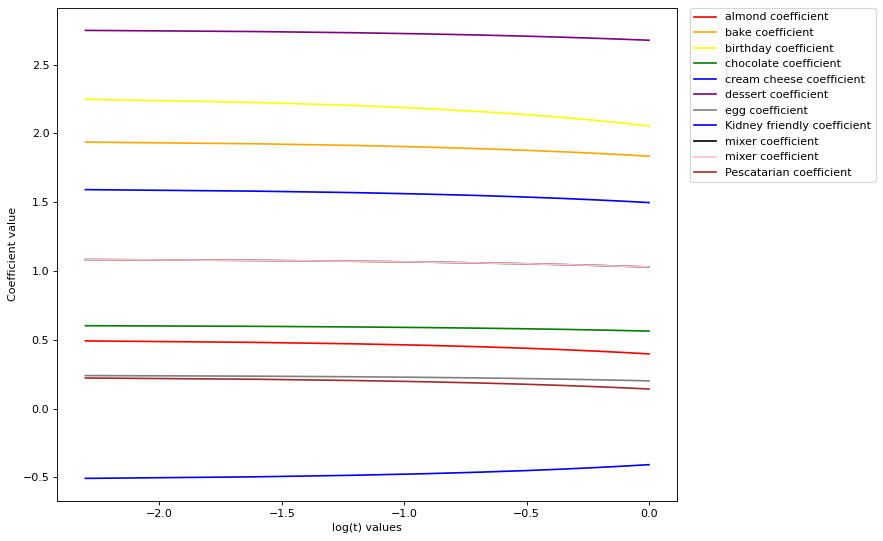

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.plot(logt,almond, color="red", label = "almond coefficient")
plt.plot(logt,bake, color="orange", label = "bake coefficient")
plt.plot(logt,birthday, color="yellow", label = "birthday coefficient")
plt.plot(logt,chocolate, color="green", label = "chocolate coefficient")
plt.plot(logt,cream, color="blue", label = "cream cheese coefficient")
plt.plot(logt,dessert, color="purple", label = "dessert coefficient")
plt.plot(logt,egg, color="gray", label = "egg coefficient")
plt.plot(logt,kidney, color="blue", label = "Kidney friendly coefficient")
plt.plot(logt,mixer, color="black", label = "mixer coefficient")
plt.plot(logt,mixer, color="pink", label = "mixer coefficient")
plt.plot(logt,fish, color="brown", label = "Pescatarian coefficient")
plt.xlabel("log(t) values")
plt.ylabel("Coefficient value")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [88]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 2, penalty= "l1", solver='liblinear')
clf.fit(trainx,trainy)
clf.coef_

array([[ 0.53173887,  1.82025512,  2.22560685,  0.18300899,  1.53092942,
         3.13316653,  0.15770695, -0.42716638,  1.00797429,  0.1003273 ]])

In [93]:
import numpy as np
testx

,almond,bake,birthday,chocolate,cream cheese,dessert,egg,kidney friendly,mixer,pescatarian
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
error = []
for i in t:
    err

Index(['almond', 'bake', 'birthday', 'chocolate', 'cream cheese', 'dessert',
       'egg', 'kidney friendly', 'mixer', 'pescatarian'],
      dtype='object')

In [32]:
predictions = []
for i in range(len(testx)):
    a = np.dot(testx[features].values[i],clf.coef_[0]) + clf.intercept_
    predictions.append(a[0])

In [33]:
clf.intercept_

array([-6.07364447])

In [34]:
max(predictions)

3.7249768954621203

In [35]:
testy.value_counts()

0.0    10399
1.0      435
Name: cake, dtype: int64

In [36]:
predictions = np.dot(test[["calories", "protein", "fat", "sodium"]].values,clf.coef_[0]) + clf.intercept_

NameError: name 'test' is not defined

In [113]:
a = []
for i in predictions:
    if i>=0.5:
        a.append(1)
    else:
        a.append(0)

In [115]:
from sklearn import metrics
dad = metrics.confusion_matrix(testy, a)
print((dad[0][0]+dad[1][1])/len(test))

0.9617940199335548


In [122]:
data = {"1": training["calories"],"2": training["protein"],"3": training["fat"], "4": training["sodium"], "5": training["#cakeweek"], "6": training["anniversary"], "7": training["bake"], "8": training["wedding"], "9": training["strawberry"]}
x_fit = pd.DataFrame(data)
y_fit = training["cake"]

In [124]:
t=[]
calories=[]
protein=[]
fat = []
sodium = []
week = []
day = []
bake = []
straw =[]

for i in range(1,21):
    t.append(math.log(i))
    a = coef(i)
    calories.append(a[0][0])
    protein.append(a[0][1])
    fat.append(a[0][2])
    sodium.append(a[0][3])
    week.append(a[0][4])
    day.append(a[0][5])
    bake.append(a[0][6])
    straw.append(a[0][7])

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn

In [125]:
data = {"t-value": t,"Calories coefficient": calories,"Protein coefficient": protein, "Fat coefficient": fat, "Sodium coefficient": sodium, "#cakeweek coefficient": week, "Anniversary coefficient": day, "Bake coefficient": bake, "Strawberry coefficient": straw}
shows = pd.DataFrame(data)
shows

,t-value,Calories coefficient,Protein coefficient,Fat coefficient,Sodium coefficient,#cakeweek coefficient,Anniversary coefficient,Bake coefficient,Strawberry coefficient
0,0.000000,0.000612,-0.041865,0.004601,-0.000649,3.205391,0.000000,3.024547,1.905153
1,0.693147,0.000269,-0.037589,0.003277,-0.000224,4.366066,-0.016600,3.054049,2.019621
2,1.098612,0.000287,-0.039126,0.003769,-0.000263,5.011548,-0.105375,3.058630,2.038928
3,1.386294,0.000587,-0.042324,0.004848,-0.000633,5.534448,-0.219562,3.053919,2.019194
4,1.609438,0.000865,-0.044731,0.003423,-0.000830,5.667896,-0.269124,3.046510,2.010409
5,1.791759,0.000291,-0.039138,0.003728,-0.000265,5.837663,-0.191326,3.064352,2.067193
6,1.945910,0.000825,-0.044464,0.003767,-0.000809,6.095656,-0.298723,3.051190,2.022920
7,2.079442,0.000312,-0.039494,0.003816,-0.000291,6.175752,-0.217892,3.064416,2.070830
8,2.197225,0.000294,-0.039000,0.003629,-0.000263,6.269862,-0.220017,3.066330,2.077415
9,2.302585,0.000573,-0.042727,0.004922,-0.000619,6.617099,-0.295865,3.060521,2.045457


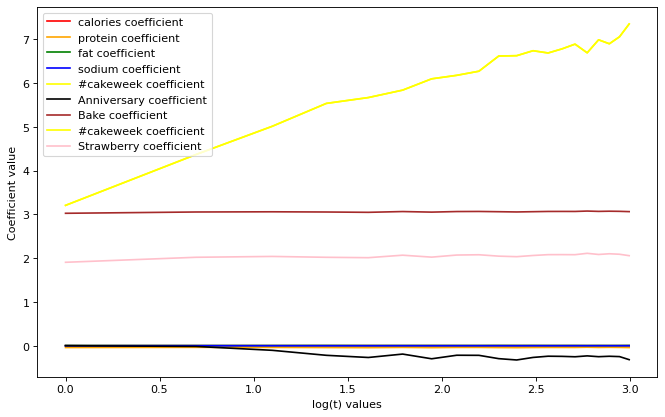

In [127]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.plot(t,calories, color="red", label = "calories coefficient")
plt.plot(t,protein, color="orange", label = "protein coefficient")
plt.plot(t,fat, color="green", label = "fat coefficient")
plt.plot(t,sodium, color="blue", label = "sodium coefficient")
plt.plot(t,week, color="yellow", label = "#cakeweek coefficient")
plt.plot(t,day, color="black", label = "Anniversary coefficient")
plt.plot(t,bake, color="brown", label = "Bake coefficient")
plt.plot(t,week, color="yellow", label = "#cakeweek coefficient")
plt.plot(t,straw, color="pink", label = "Strawberry coefficient")
plt.xlabel("log(t) values")
plt.ylabel("Coefficient value")
plt.legend()

In [128]:
def accuracy(t):
    clf = LogisticRegression(C= t/10, penalty= "l1", solver='liblinear')
    clf.fit(trainx,trainy)
    predictions = []
    for i in range(len(testx)):
        a = np.dot(testx[features].values[i],clf.coef_[0]) + clf.intercept_
        predictions.append(a[0])
    q=[]
    for i in predictions:
        if i>=0.5:
            q.append(1)
        else:
            q.append(0)
    dad = metrics.confusion_matrix(test.cake, q)
    b = (dad[0][0]+dad[1][1])/len(test)
    return(t,b)

In [132]:
a=[]
b=[]
for j in range(1,51):
    c=accuracy(j)[0]
    d=accuracy(j)[1]
    a.append(c)
    b.append(d)
dog = {"a": a, "b": b}
ding = pd.DataFrame(dog)
ding

,a,b
0,1,0.961517
1,2,0.962071
2,3,0.961794
3,4,0.961794
4,5,0.961517
5,6,0.961517
6,7,0.961517
7,8,0.961794
8,9,0.961794
9,10,0.961794


In [139]:
for i in range(len(ding)):
    if b[i] == ding.iloc[ding['b'].idxmax()][1]:
        print(i)

1
10


In [138]:
ding.iloc[ding['b'].idxmax()][1]

0.9620708748615725

In [136]:
print(ding.b[1],ding.b[10])

0.9620708748615725 0.9620708748615725


Text(0, 0.5, 'accuracy (%)')

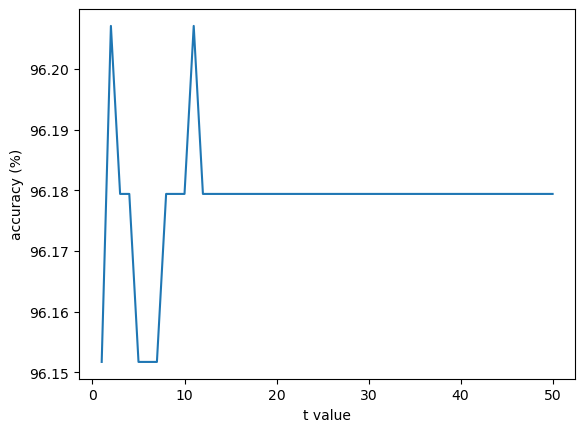

In [141]:
plt.plot(ding.a,ding.b*100)
plt.xlabel("t value")
plt.ylabel("accuracy (%)")

In [39]:
df2["cake"]

0        0.0
1        0.0
2        0.0
4        0.0
5        0.0
        ... 
20047    0.0
20048    0.0
20049    0.0
20050    0.0
20051    0.0
Name: cake, Length: 14446, dtype: float64

In [40]:
Xdf = df2.drop(['cake'], axis=1)

In [142]:
x1 = df3.drop("cake", axis=1)
y1=df3["cake"]

In [31]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x1.values)
X = scaler.transform(x1.values)

NameError: name 'x1' is not defined

In [144]:
X

array([[-9.92098041e-01, -1.65681566e-02, -1.77492853e-02, ...,
        -3.72342006e-02, -2.88334940e-02,  7.08709746e+00],
       [ 4.80049631e-01, -1.66294092e-02, -2.11636639e-02, ...,
        -3.72342006e-02, -2.88334940e-02, -1.41101488e-01],
       [-1.06662598e-02, -1.72632401e-02, -2.45780425e-02, ...,
        -3.72342006e-02, -2.88334940e-02, -1.41101488e-01],
       ...,
       [ 4.80049631e-01, -1.62033044e-02, -1.74647537e-02, ...,
        -3.72342006e-02, -2.88334940e-02,  7.08709746e+00],
       [ 4.80049631e-01, -1.60222099e-02, -1.34813120e-02, ...,
        -3.72342006e-02, -2.88334940e-02, -1.41101488e-01],
       [ 4.80049631e-01, -1.62112939e-02, -5.51442864e-03, ...,
        -3.72342006e-02, -2.88334940e-02, -1.41101488e-01]])

In [145]:
from numpy.linalg import svd

In [146]:
U, s, VT = svd(X)

In [147]:
s.sum(), s

(77326.05865233428,
 array([3.25662360e+02, 2.96886074e+02, 2.67483659e+02, 2.33877545e+02,
        2.28913394e+02, 2.14003723e+02, 2.09535884e+02, 1.98552639e+02,
        1.95063518e+02, 1.90033715e+02, 1.89700230e+02, 1.87821625e+02,
        1.84978221e+02, 1.83473210e+02, 1.81594612e+02, 1.79781623e+02,
        1.77942924e+02, 1.76175375e+02, 1.75199014e+02, 1.73727227e+02,
        1.73013320e+02, 1.71807668e+02, 1.71345819e+02, 1.70870277e+02,
        1.70514570e+02, 1.69976931e+02, 1.67767101e+02, 1.67029684e+02,
        1.65652644e+02, 1.65138324e+02, 1.64501200e+02, 1.64124745e+02,
        1.63259393e+02, 1.62716094e+02, 1.62211804e+02, 1.61855472e+02,
        1.60720961e+02, 1.60115314e+02, 1.59798814e+02, 1.59758702e+02,
        1.59297901e+02, 1.58499143e+02, 1.58143430e+02, 1.57403668e+02,
        1.57372578e+02, 1.56940561e+02, 1.56175692e+02, 1.56034997e+02,
        1.55607794e+02, 1.55510109e+02, 1.55037781e+02, 1.54797309e+02,
        1.54621529e+02, 1.54008315e+02, 1.53

In [148]:
U.shape, s.shape, VT.shape

((14446, 14446), (678,), (678, 678))

In [149]:
s/s.sum()

array([4.21154739e-03, 3.83940524e-03, 3.45916582e-03, 3.02456312e-03,
       2.96036547e-03, 2.76754987e-03, 2.70977064e-03, 2.56773256e-03,
       2.52261038e-03, 2.45756371e-03, 2.45325098e-03, 2.42895640e-03,
       2.39218479e-03, 2.37272160e-03, 2.34842711e-03, 2.32498107e-03,
       2.30120255e-03, 2.27834417e-03, 2.26571762e-03, 2.24668410e-03,
       2.23745168e-03, 2.22185988e-03, 2.21588714e-03, 2.20973731e-03,
       2.20513722e-03, 2.19818434e-03, 2.16960627e-03, 2.16006981e-03,
       2.14226158e-03, 2.13561026e-03, 2.12737081e-03, 2.12250240e-03,
       2.11131145e-03, 2.10428537e-03, 2.09776376e-03, 2.09315559e-03,
       2.07848381e-03, 2.07065143e-03, 2.06655838e-03, 2.06603963e-03,
       2.06008044e-03, 2.04975070e-03, 2.04515053e-03, 2.03558375e-03,
       2.03518168e-03, 2.02959473e-03, 2.01970325e-03, 2.01788375e-03,
       2.01235905e-03, 2.01109577e-03, 2.00498750e-03, 2.00187766e-03,
       1.99960443e-03, 1.99167419e-03, 1.98888318e-03, 1.98345609e-03,
      

In [150]:
PC = np.dot (X, VT)

In [151]:
PC.shape

(14446, 678)

In [152]:
colors = {0: "red", 1: "blue"}

In [154]:
y1.map(colors)

0        red
1        red
2        red
3        red
4        red
        ... 
14441    red
14442    red
14443    red
14444    red
14445    red
Name: cake, Length: 14446, dtype: object

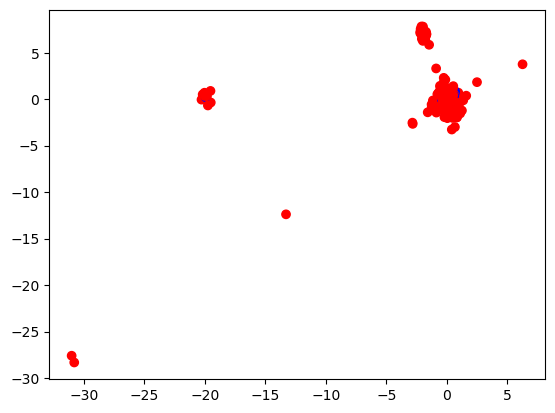

In [156]:
plt.scatter(PC[:,1], PC[:,2],  c = y1.map(colors))

In [154]:
VT[0]

array([-4.30751004e-02, -4.07475941e-03, -3.04659447e-03, -4.25494071e-03,
       -3.70562015e-03, -7.95191245e-03, -4.30976206e-03, -3.08065043e-04,
        2.10218862e-03, -1.68669946e-03, -1.33389318e-02,  1.68003478e-03,
        3.83152329e-03,  1.26519286e-01, -2.35288992e-02, -3.87922454e-03,
       -6.93157120e-03,  1.80725874e-03, -6.80971894e-03,  4.19564391e-03,
        1.25937549e-02, -6.24833730e-02, -1.06068518e-02, -3.51972176e-04,
       -1.63751563e-02,  8.31702543e-04, -2.29443491e-03, -6.92545967e-03,
       -5.03944622e-03, -8.29376923e-03,  2.97016175e-05, -3.51866647e-03,
        3.67866824e-03, -3.29946349e-03, -1.42938711e-02,  1.08368495e-03,
        1.16227100e-02, -6.18403066e-02, -1.73779666e-02, -4.23303481e-03,
        1.28359219e-02,  1.30550268e-02,  8.09009915e-04,  3.96173198e-03,
        4.55559024e-02,  6.68043401e-03,  4.12756033e-03,  1.26917357e-02,
        9.39744990e-03, -1.81777317e-02,  9.79375317e-03, -3.71636655e-02,
        3.19360452e-03, -

In [156]:
X

array([[-0.98092149, -0.0164649 , -0.01829777, ..., -0.03640751,
        -0.02863804,  6.7877967 ],
       [ 0.47768051, -0.01652882, -0.02142005, ..., -0.03640751,
        -0.02863804, -0.14732321],
       [-0.00852016, -0.01719023, -0.02454234, ..., -0.03640751,
        -0.02863804, -0.14732321],
       ...,
       [ 0.47768051, -0.01608418, -0.01803758, ..., -0.03640751,
        -0.02863804,  6.7877967 ],
       [ 0.47768051, -0.0158952 , -0.01439492, ..., -0.03640751,
        -0.02863804, -0.14732321],
       [ 0.47768051, -0.01609251, -0.00710959, ..., -0.03640751,
        -0.02863804, -0.14732321]])

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
dfx = df2.copy()
scaler = StandardScaler()
scaler.fit(dfx)
dfx = scaler.transform(dfx)

In [34]:
pcA = PCA()
pcA.fit(dfx)
df_x2 = pcA.transform(dfx)

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
colors = { "0" : "blue", "1": "orange"}

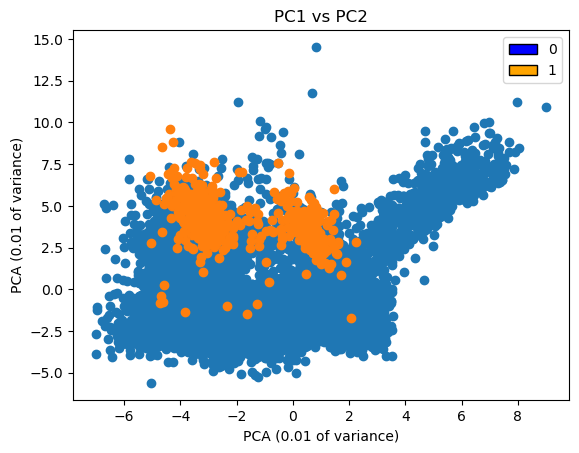

In [37]:
pcs = pcA.components_
variances = pcA.explained_variance_ratio_
fig, ax = plt.subplots()
for i, label in enumerate(df2["cake"].unique()):
    ax.scatter(df_x2[df2["cake"]==label,0], df_x2[df2["cake"]==label,1])
    

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
ax.set_xlabel(f"PCA ({variances[0]:.2f} of variance)")
ax.set_ylabel(f"PCA ({variances[1]:.2f} of variance)")
ax.set_title("PC1 vs PC2")
ax.legend(handles=legend_elements)
plt.show()



In [314]:
var = pd.DataFrame({"PC": np.arange(1,len(variances)+1), "Variance explained": variances})
var.head()

,PC,Variance explained
0,1,0.011026
1,2,0.009262
2,3,0.007467
3,4,0.005689
4,5,0.005448


In [38]:
cumulative = np.cumsum(variances)
n = np.argmax(cumulative>=0.8)+1
print(n)

430


In [39]:
n

430

In [40]:
pca = PCA(n_components = n)
pca.fit(df2)
df_final = pca.transform(df2)

In [41]:
yf = df2["cake"].values

In [42]:
trainx = df_final[:split]
trainy = yf[:split]
testx = df_final[split:]
testy = yf[split:]

In [43]:
t=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [45]:
coef = []
for i in t:
    clf = LogisticRegression(C= 1/i, penalty= "l1", solver='liblinear')
    clf.fit(trainx,trainy)
    coef.append(clf.coef_.ravel())

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn

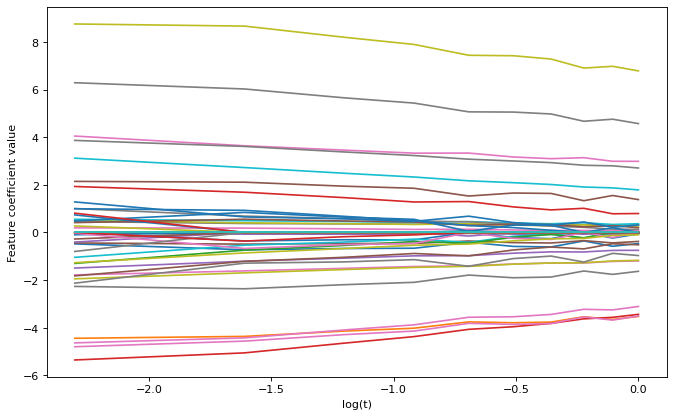

In [47]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
ax.plot(logt, coef)
ax.set_xlabel('log(t)')
ax.set_ylabel('Feature coefficient value')
plt.show()

In [63]:
t

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [68]:
math.log(t)

TypeError: must be real number, not list

In [48]:
errorf=[]
for i in t:
    clf = LogisticRegression(C= 1/i, penalty= "l1", solver='liblinear')
    clf.fit(trainx,trainy)
    error = 1 - clf.score(testx, testy)
    errorf.append(error)
a = min(errorf)
b = errorf.index(a)
print("t-value that minimizes error: ", t[b])
print("Test error: ", a)

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn

t-value that minimizes error:  0.2
Test error:  0.0011999261583902632


/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
errorf

[0.0014768321949418795,
 0.0011999261583902632,
 0.0016614362193095866,
 0.0018460402436772938,
 0.0018460402436772938,
 0.0012922281705741723,
 0.0014768321949418795,
 0.0016614362193095866,
 0.0017537382314934957,
 0.00212294628022891]

In [65]:
clf = LogisticRegression(C= 2, penalty= "l1", solver='liblinear')
clf.fit(trainx,trainy)
error = 1 - clf.score(testx, testy)

In [66]:
error

0.0018460402436772938

In [50]:
num_features_coef2 = np.count_nonzero(coef2[-1])
num_features_pca = np.count_nonzero(pcs[:n, :])
print("Num features in L1 Feature Select:", num_features_coef2)
print("Num features in PCA:", num_features_pca)

Num features in L1 Feature Select: 10
Num features in PCA: 291239


In [51]:
num_features = [np.count_nonzero(c) for c in [coefs, coef2]]
num_features

[1468, 100]